#### <b> BANK CUSTOMER CHURN </b>

#### <b>About Dataset</b>
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

#### <b> IMPORTING THE DEPENDENCIES </b>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings as w
w.filterwarnings('ignore')

In [2]:
#default setiings

sns.set_theme('notebook')
colors =  ['#8e0201', '#e8cccc', '#e7bbbb']


sns.set_style('darkgrid')

plt.rcParams['figure.figsize']= (15,10)

#### <b> Data laoding </b>

In [3]:
dataset = '../dataset/'
train_data = None

for dirname, _, filenames in os.walk(dataset):
    for file in filenames:
        path = os.path.join(dirname, file)
        train_data= pd.read_csv(path)

In [4]:
#displaying the first 5 rows
train_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
#dropping the last two columns
train_data= train_data.iloc[:, :-2]
train_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### <b> Data Preprocessing </b>

In [6]:
#checking the clumns names
train_data.columns.tolist()

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Inferences:
1. The CLIENTNUM Feature is a unique identifier. So it will be dropped.

In [7]:
data = train_data.copy()

train_data= train_data.drop('CLIENTNUM', axis=1)

In [11]:
data.to_csv("../dataset/bank_churn.csv", index=False)

In [8]:
#checking for missing, duplicate and unque values
pd.DataFrame({
    'Features': [col for col in train_data.columns],
    'Missing Values': [train_data[col].isna().sum() for col in train_data.columns],
    '% Missing Values': [train_data[col].isna().sum()/ len(train_data) for col in train_data],
    'No of Unique Values Count': [train_data[col].nunique() for col in train_data.columns],
    'Duplicate Values': [train_data.duplicated().sum() for col in train_data.columns]

})

,Features,Missing Values,% Missing Values,No of Unique Values Count,Duplicate Values
0,Attrition_Flag,0,0.0,2,0
1,Customer_Age,0,0.0,45,0
2,Gender,0,0.0,2,0
3,Dependent_count,0,0.0,6,0
4,Education_Level,0,0.0,7,0
5,Marital_Status,0,0.0,4,0
6,Income_Category,0,0.0,6,0
7,Card_Category,0,0.0,4,0
8,Months_on_book,0,0.0,44,0
9,Total_Relationship_Count,0,0.0,6,0


Inferences:
1. There are No Missing Values nor Duplicate Values in the data.

In [9]:
#general information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
train_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Columns: 20 entries, Attrition_Flag to Avg_Utilization_Ratio
dtypes: float64(5), int64(9), object(6)
memory usage: 1.5+ MB


Inferences:
1. There are 20 Features in the data of which 14 of them are Numerical while 6 are categorical.

In [11]:
#overall stats
train_data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### <b> EDA </b>

In [12]:
#selecting categorical features
cat_features = train_data.select_dtypes(exclude=np.number).columns.tolist()
cat_features

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [13]:
#selecting numerical features
num_features = train_data.select_dtypes(exclude='object').columns.tolist()
num_features

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [14]:
for idx, val in enumerate(cat_features):
    print(f'Feature : {val}')
    print(f'Unique Values Count: {train_data[val].value_counts()}\n')

Feature : Attrition_Flag
Unique Values Count: Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Feature : Gender
Unique Values Count: Gender
F    5358
M    4769
Name: count, dtype: int64

Feature : Education_Level
Unique Values Count: Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Feature : Marital_Status
Unique Values Count: Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Feature : Income_Category
Unique Values Count: Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Feature : Card_Category
Unique Values Count: Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, 

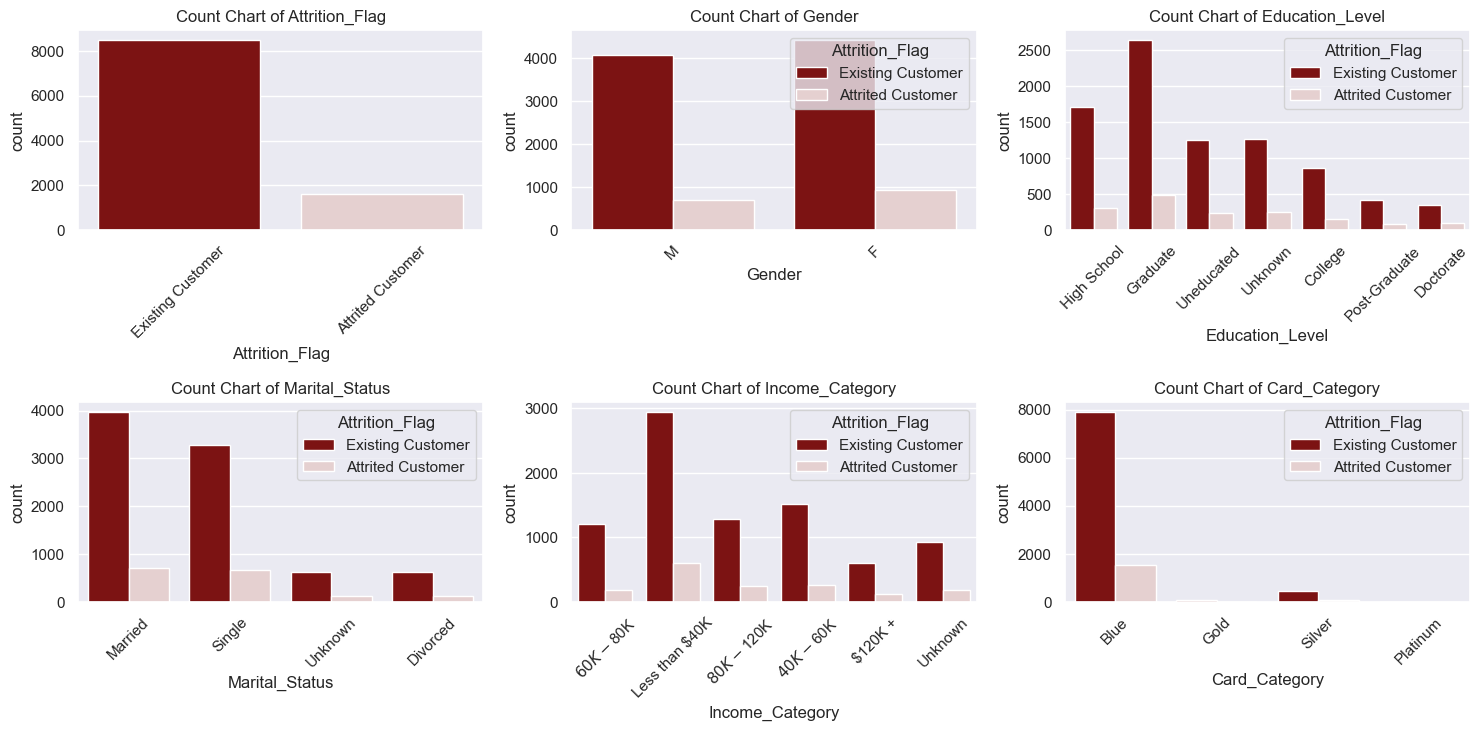

In [15]:
for idx, val in enumerate(cat_features):
    plt.subplot(3,3, idx+1)
    sns.countplot(x=val, data=train_data, palette=colors, hue="Attrition_Flag")
    plt.title(f'Count Chart of {val}')
    plt.xticks(rotation=45)


plt.tight_layout(w_pad=1.2, h_pad=1.2)
plt.show()

#### <b> Correlation Matrix </b>

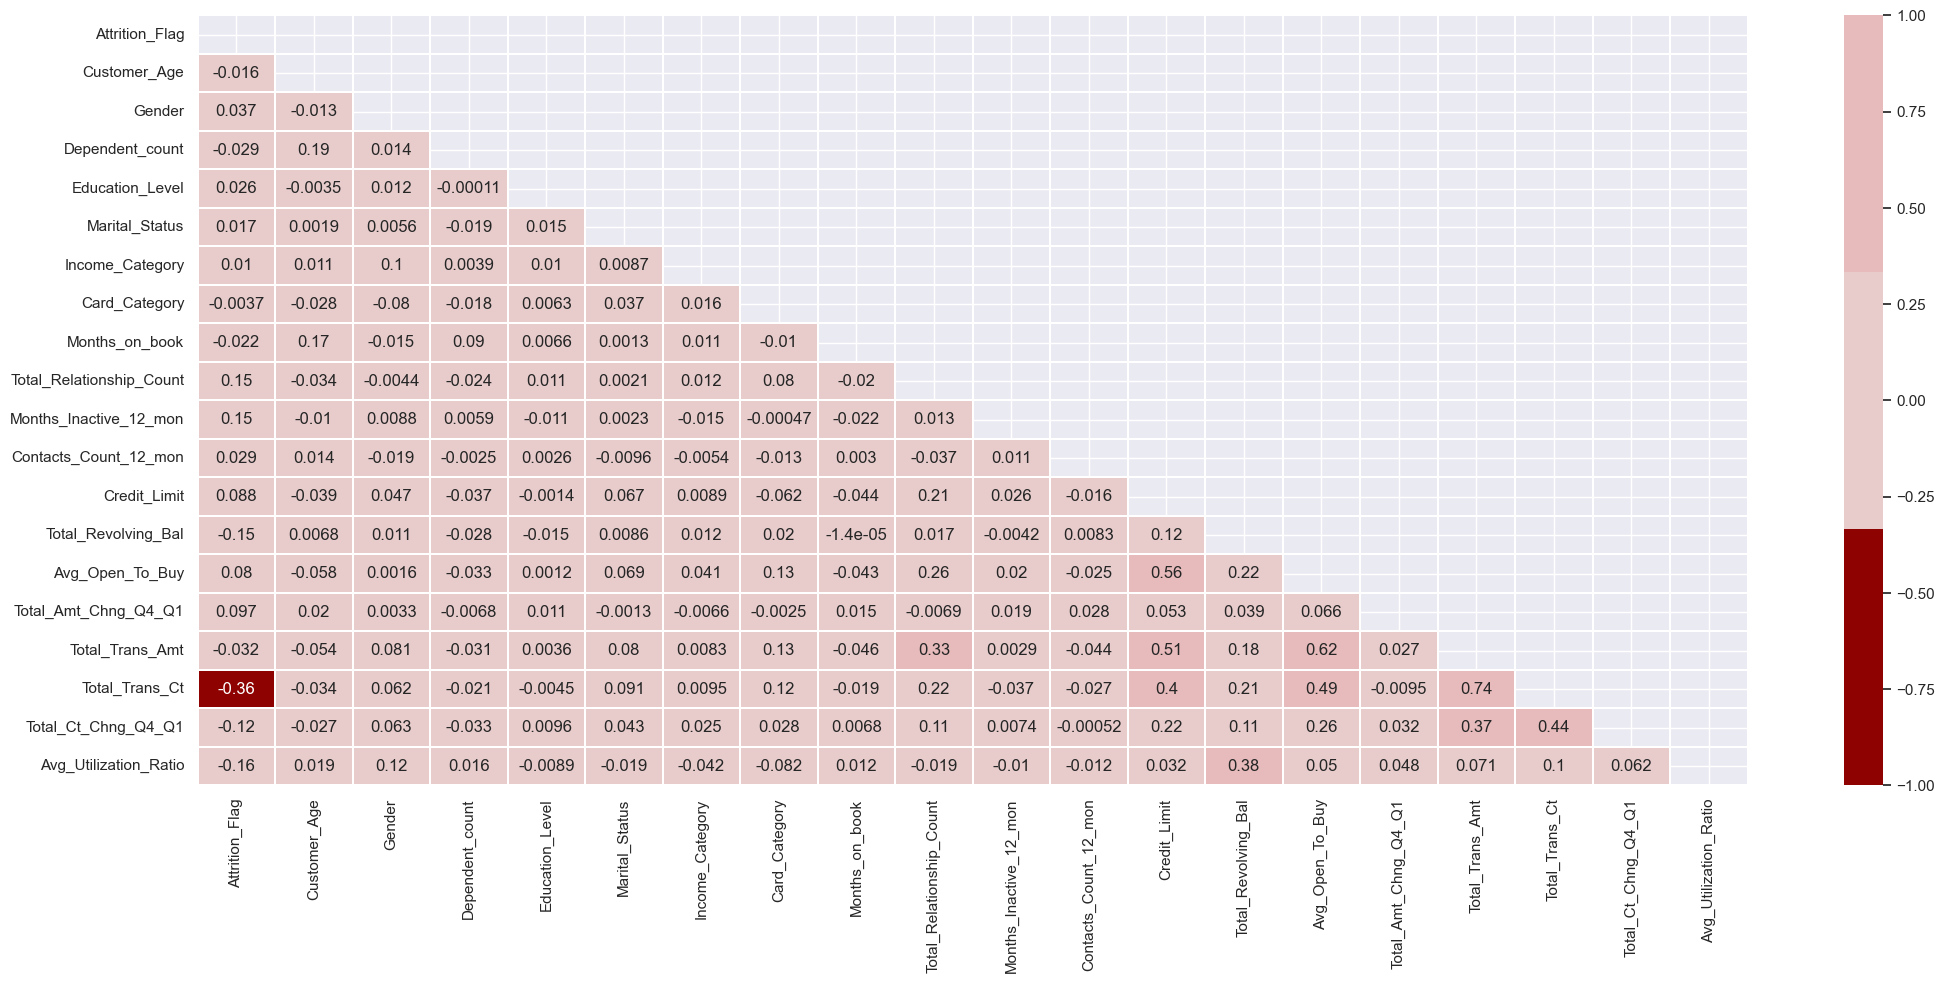

In [16]:
plt.figure(figsize=(25, 10))

corr = train_data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap=colors, vmin=-1, vmax=1)

#### <b> Data Encoding </b>

In [17]:
# Dictionary to store encoders for each column
encoders = {}

# Encode and store encoder for each categorical column
for col in cat_features:
    print(f"Encoding {col}-------")
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    encoders[col] = le
    print(train_data[col].value_counts())

Encoding Attrition_Flag-------
Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64
Encoding Gender-------
Gender
0    5358
1    4769
Name: count, dtype: int64
Encoding Education_Level-------
Education_Level
2    3128
3    2013
6    1519
5    1487
0    1013
4     516
1     451
Name: count, dtype: int64
Encoding Marital_Status-------
Marital_Status
1    4687
2    3943
3     749
0     748
Name: count, dtype: int64
Encoding Income_Category-------
Income_Category
4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: count, dtype: int64
Encoding Card_Category-------
Card_Category
0    9436
3     555
1     116
2      20
Name: count, dtype: int64


#### <b> Data Scaling </b>

In [18]:
# Dictionary to store scalers per column
scalers = {}

# Apply MinMaxScaler to each numerical feature individually
for col in num_features:
    print(f"Scaling {col} ---")
    scaler = MinMaxScaler()
    train_data[col] = scaler.fit_transform(train_data[[col]])
    scalers[col] = scaler  # Save the scaler

print("Done --------------------------------")

Scaling Customer_Age ---
Scaling Dependent_count ---
Scaling Months_on_book ---
Scaling Total_Relationship_Count ---
Scaling Months_Inactive_12_mon ---
Scaling Contacts_Count_12_mon ---
Scaling Credit_Limit ---
Scaling Total_Revolving_Bal ---
Scaling Avg_Open_To_Buy ---
Scaling Total_Amt_Chng_Q4_Q1 ---
Scaling Total_Trans_Amt ---
Scaling Total_Trans_Ct ---
Scaling Total_Ct_Chng_Q4_Q1 ---
Scaling Avg_Utilization_Ratio ---
Done --------------------------------


In [19]:
# saving the scaler and encoder

joblib.dump(scalers, "../models/churn_scaler.joblib")
joblib.dump(encoders, "../models/churn_encoder.joblib")

['../models/churn_encoder.joblib']

### <b>Model Building </b>

In [20]:
#data splitting
X= train_data.drop('Attrition_Flag', axis=1)
y= train_data['Attrition_Flag'].values

In [22]:
#data splitting
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
classifieres = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [24]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#performing cross validation
for clf_name , clf in classifieres.items():
    print(f"Performing Cross-Validation for {clf_name}:")
    cv_scores = []


    for fold_no , (train_index, val_index) in enumerate(skf.split(X_train,y_train)):
        print(f"  Fold {fold_no + 1}...")
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train , y_val = y[train_index], y[val_index]

        #model training
        clf.fit(X_train, y_train)

        #appeneding the scores
        cv_scores.append(clf.score(X_val, y_val))
    # printing cross-validation scores
    print(f"{clf_name} Cross-Validation Scores:", cv_scores)

    # calculating and printing mean cross-validation score
    mean_cv_score = sum(cv_scores) / len(cv_scores)
    print(f"Mean {clf_name} Cross-Validation Score:", mean_cv_score)
    print('\n')


Performing Cross-Validation for Random Forest:
  Fold 1...
  Fold 2...
  Fold 3...
  Fold 4...
  Fold 5...
Random Forest Cross-Validation Scores: [0.9728562615669339, 0.9604938271604938, 0.9586419753086419, 0.9746913580246913, 0.9660493827160493]
Mean Random Forest Cross-Validation Score: 0.9665465609553621


Performing Cross-Validation for XGBoost:
  Fold 1...
  Fold 2...
  Fold 3...
  Fold 4...
  Fold 5...
XGBoost Cross-Validation Scores: [0.9699306090979183, 0.9691358024691358, 0.9768518518518519, 0.9729938271604939, 0.966820987654321]
Mean XGBoost Cross-Validation Score: 0.9711466156467441




Inferences:
On the Cross Validation Split with Stratified K-Fold:
1. Random Forest had an average score of 0.97 % approximately.
2. XGBoost had an average score of 0.97% approximately.

#### <b>HyperParameter Tuning </b>

In [25]:
#parametr grid
param_grids= {
    'Random Forest': {
        'classifier': RandomForestClassifier(random_state=42),
        'param_grid':{
            'n_estimators': list(range(10,300, 50)),
            'max_depth': list(range(2,15,5)),
            'min_samples_split': [2,510],
            'min_samples_leaf': [1,2,4]
        }

    },
    'XGBoost':{
        'classifier': XGBClassifier(random_state=42),
        'param_grid': {
            'n_estimators': list(range(10,300, 50)),
            'max_depth': list(range(2,15,5)),
            'learning_rate': [0.01, 0.1, 0.3],
            'subsample': [0.7, 0.8, 0.9],
            'colsample_bytree': [0.7, 0.8, 0.9]
        }

    }
}

In [26]:
# Perform hyperparameter tuning for each classifier
for clf_name, clf_info in param_grids.items():
    print(f"Performing Hyperparameter Tuning for {clf_name}:")

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=clf_info['classifier'], param_grid=clf_info['param_grid'], cv=5, scoring='accuracy')

    # Perform grid search
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}\n")

Performing Hyperparameter Tuning for Random Forest:
Best Parameters: {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 60}
Best Score: 0.9411764705882353

Performing Hyperparameter Tuning for XGBoost:
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 260, 'subsample': 0.9}
Best Score: 0.9587270973963357



Inferences:
1. The XGBoost Model had a much higher accuracy 0.96% than the Random Forest 0.94 approximately.

#### <b> Final Model </b>

In [27]:
model_xgb = XGBClassifier(
    colsample_bytree= 0.7, learning_rate= 0.3, max_depth= 2, n_estimators= 260, subsample= 0.9)

model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=260,
              n_jobs=None, num_parallel_tree=None, ...)

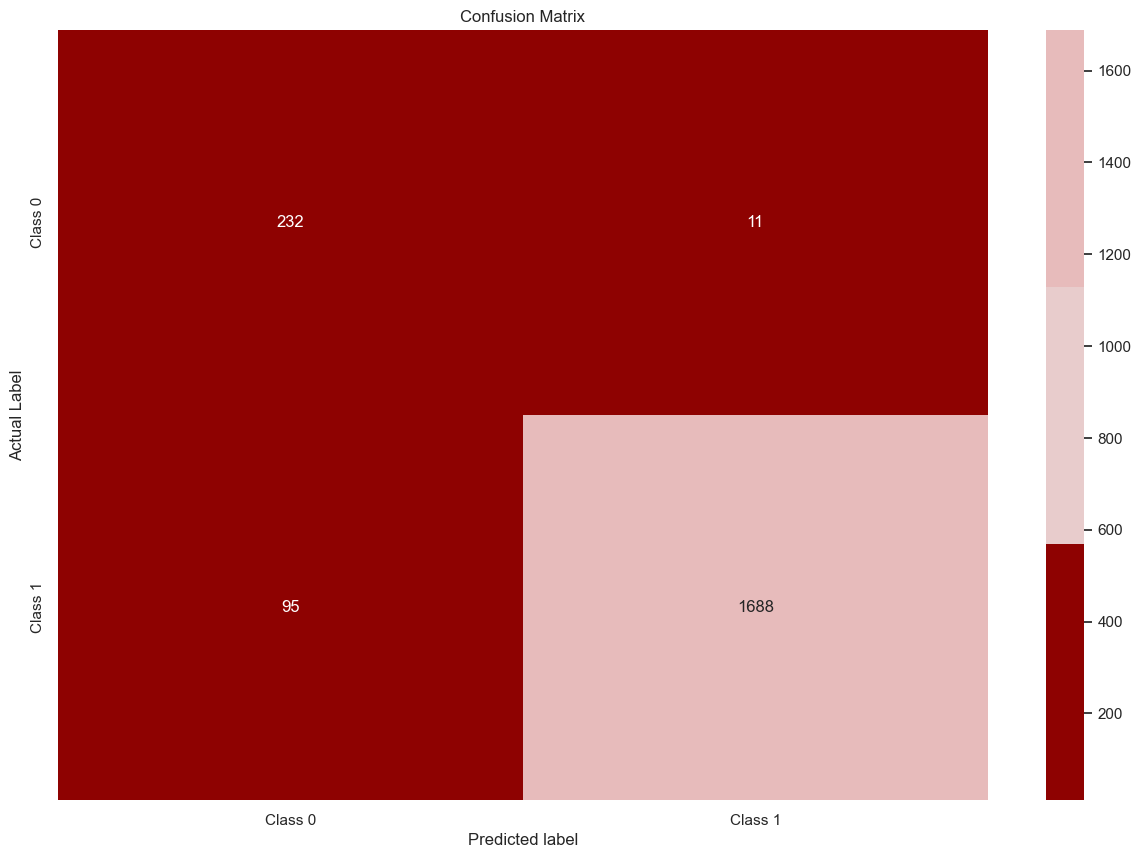

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.95      0.81       243
           1       0.99      0.95      0.97      1783

    accuracy                           0.95      2026
   macro avg       0.85      0.95      0.89      2026
weighted avg       0.96      0.95      0.95      2026



In [28]:
# training the model
model_xgb.fit(X_train, y_train)
# making predictions
y_pred = model_xgb.predict(X_test)

# generating the report and confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=colors,
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"],
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("Actual Label")
plt.show()

# classification report
report = classification_report(y_pred, y_test)
print("Classification Report\n", report)

Inferences:
1. The Model Acheived an Accuracy Score of 0.95 Overall.
2. The Precison for the Positive label is 0.99 while for the Negative label is 0.71

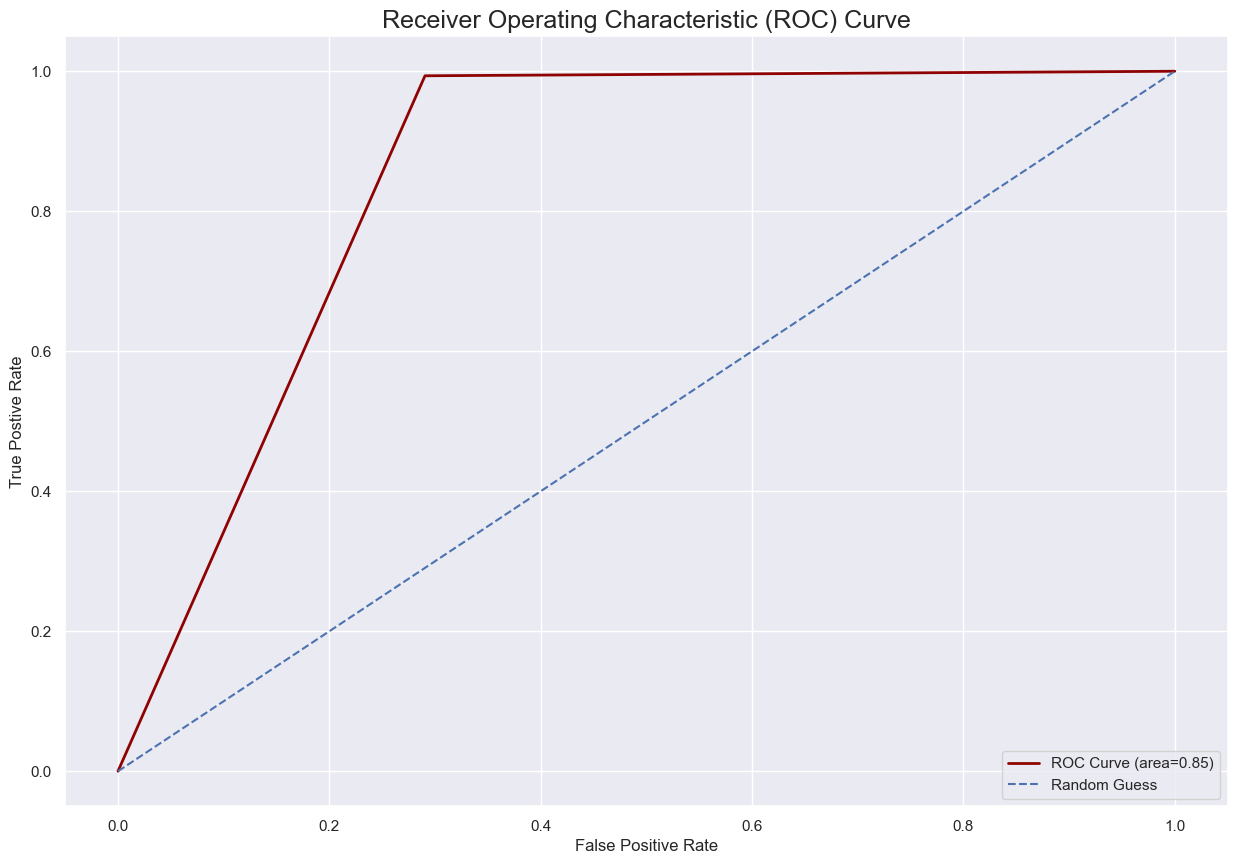

In [29]:
#roc curve plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color=colors[0], lw=2, label='ROC Curve (area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1], label='Random Guess', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize=18)
plt.legend(loc='lower right')

1. The ROC-CURVE is 0.85% which is very good for an imbalanced data.

#### <b> Saving the Model </b>

In [34]:
joblib.dump(model_xgb, '../models/churn_predictor.joblib')

['../models/churn_predictor.joblib']

<b>Conclusion</b> <br>
The END!.